In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('eda-project')
jovian.set_colab_id('1EVtD_U4ViO19-NlcBsL2PpnHyjgwo6n9')

     |████████████████████████████████| 68 kB 3.0 MB/s 


In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="eda-project")

# US Accidents Exploratory Data Analysis

# opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
# using --quiet can simply remove the output from pip command

In [ ]:
import opendatasets as od
url_data='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(url_data)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ushnakhan111111
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 166MB/s]


# importing the dataset

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/us-accidents/US_Accidents_Dec21_updated.csv")

# Data Preparation and Data Cleaning

In [ ]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
data.shape   #28L rows

(2845342, 47)

In [ ]:
data.describe().round(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342.00,2845342.00,2845342.00,2845342.00,2845342.00,2845342.00,1101431.00,2776068.00,2375699.00,2772250.00,2786142.00,2774796.00,2687398.00,2295884.00
mean,2.14,36.25,-97.11,36.25,-97.11,0.70,8089.41,61.79,59.66,64.37,29.47,9.10,7.40,0.01
std,0.48,5.36,18.32,5.36,18.32,1.56,18360.09,18.62,21.16,22.87,1.05,2.72,5.53,0.09
min,1.00,24.57,-124.55,24.57,-124.55,0.00,0.00,-89.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.45,-118.03,33.45,-118.03,0.05,1270.00,50.00,46.00,48.00,29.31,10.00,3.50,0.00
50%,2.00,36.10,-92.42,36.10,-92.42,0.24,4007.00,64.00,63.00,67.00,29.82,10.00,7.00,0.00
75%,2.00,40.16,-80.37,40.16,-80.37,0.76,9567.00,76.00,76.00,83.00,30.01,10.00,10.00,0.00
max,4.00,49.00,-67.11,49.08,-67.11,155.19,9999997.00,196.00,196.00,100.00,58.90,140.00,1087.00,24.00


In [ ]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
numeric=['float64','int64']
df_numeric=data.select_dtypes(include=numeric)

In [ ]:
df_numeric.head().shape

(5, 14)

In [ ]:
df_numeric.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01


# percentage of missing values per column

In [ ]:
missing_percentage=df_numeric.isna().sum().sort_values(ascending=False)/len(df_numeric)*100

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = (14,8)

In [ ]:
missing_percentage

Number               61.290031
Precipitation(in)    19.310789
Wind_Chill(F)        16.505678
Wind_Speed(mph)       5.550967
Humidity(%)           2.568830
Visibility(mi)        2.479350
Temperature(F)        2.434646
Pressure(in)          2.080593
Severity              0.000000
Start_Lat             0.000000
Start_Lng             0.000000
End_Lat               0.000000
End_Lng               0.000000
Distance(mi)          0.000000
dtype: float64

In [ ]:
missing_percentage=missing_percentage[missing_percentage!=0]

In [ ]:
import plotly.express as px
fig=px.bar(missing_percentage,
            title="Missing values percentage in numeric attributes")
fig.show()

the columns which have more than half the number of rows missing can be dropped and here the Number column has more than 60% of values are missing

#Analyzing few columns from the DataSet

In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
data.City.isna().sum()

137

In [ ]:
data.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [ ]:
data.City.value_counts()[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [ ]:
data[data['City']=='New York']

In [ ]:
'New York' in data.City.unique()

True

In [ ]:
fig=px.bar(data.City.value_counts()[:20],
            title="Number of Accidents held city wise in USA")
fig.show()

In [ ]:
data.City.value_counts()['New York']

7068

In [ ]:
cities=data.City.value_counts()

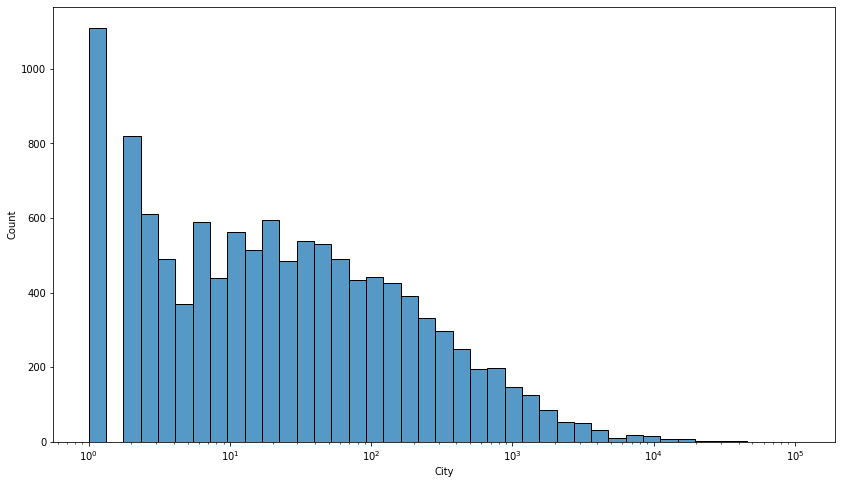

In [ ]:
sns.histplot(cities,log_scale=True)
plt.show()

In [ ]:
cities_high=cities[cities>1500]
cities_low=cities[cities<=1500]

In [ ]:
len(cities[cities>1500])/len(data)*100


0.01075441897669946

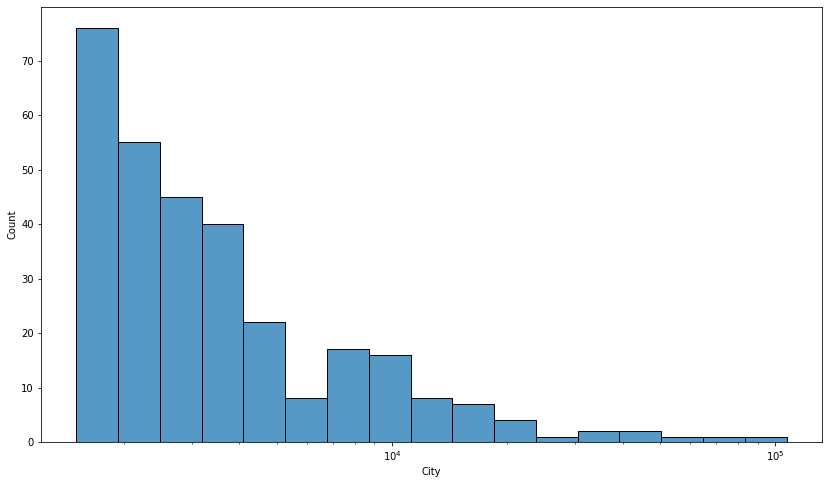

In [ ]:
sns.histplot(cities_high,log_scale=True)
plt.show()

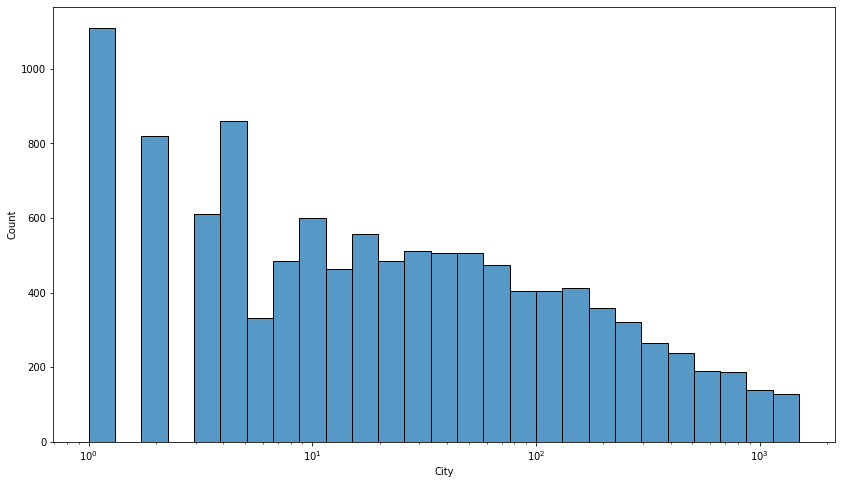

In [ ]:
sns.histplot(cities_low,log_scale=True)
plt.show()

## Analysing Start Time Column

In [ ]:
data['Start_Time']=pd.to_datetime(data['Start_Time'])

In [ ]:
data['Start_Time'][0]

Timestamp('2016-02-08 00:37:08')

#### At which time of the day most of the accidents are happening?

In [ ]:
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


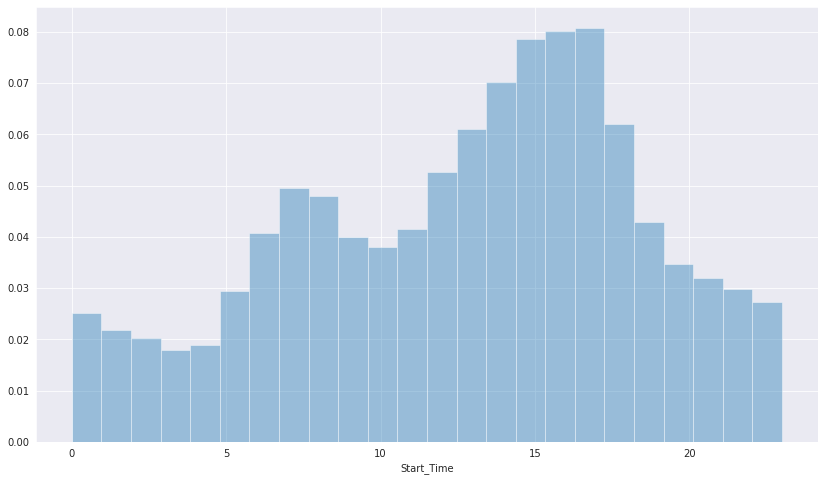

In [ ]:
sns.distplot(data['Start_Time'].dt.hour, bins=24,kde=False,norm_hist=True)

plt.show()

In [ ]:
data['Start_Time'][999].dayofweek

2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


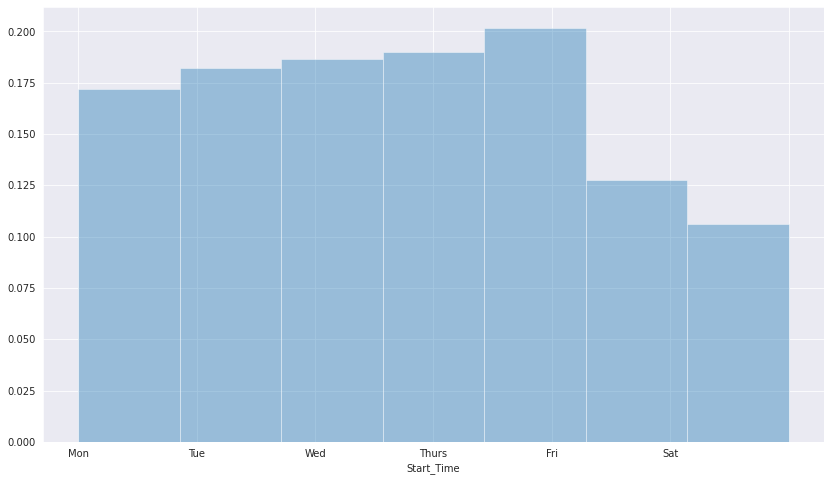

In [ ]:
ax=sns.distplot(data['Start_Time'].dt.dayofweek, bins=7,kde=False,norm_hist=True)

#plt.xticks(["Sun",'Mon','Tue','Wed','Thurs','Fri','Sat'])

ax.set_xticklabels(["Sun",'Mon','Tue','Wed','Thurs','Fri','Sat'])

plt.show()

### is the distribution of accidents by hours holds same for weekends?

In [ ]:
weekends=data.Start_Time[(data['Start_Time'].dt.dayofweek==5) | (data['Start_Time'].dt.dayofweek==6)]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


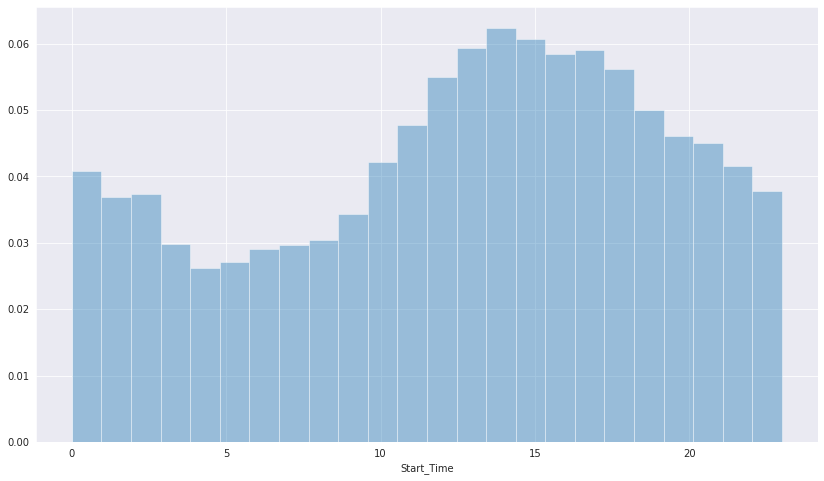

In [ ]:
ax=sns.distplot(weekends.dt.hour,kde=False,bins=24,norm_hist=True)

plt.show()

###Comparing accidents by hours for Sundays and Mondays

In [ ]:
Sundays=data.Start_Time[(data['Start_Time'].dt.dayofweek==6)]
Mondays=data.Start_Time[(data['Start_Time'].dt.dayofweek==0)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


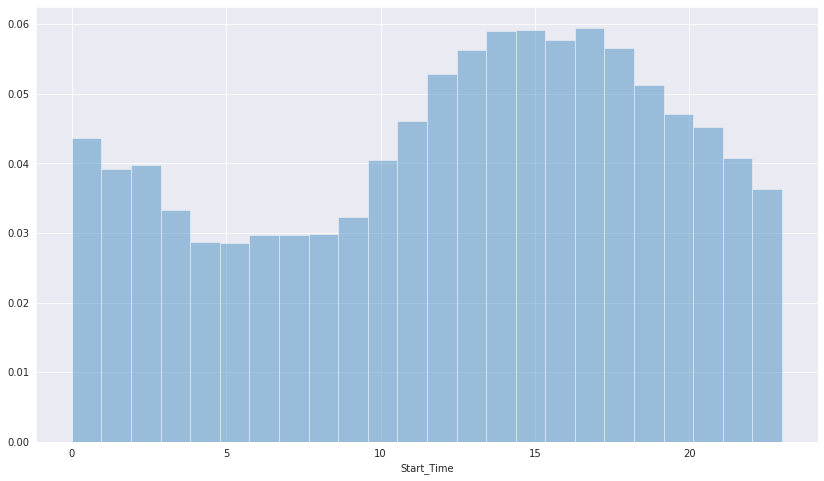

In [ ]:
ax=sns.distplot(Sundays.dt.hour,kde=False,bins=24,norm_hist=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


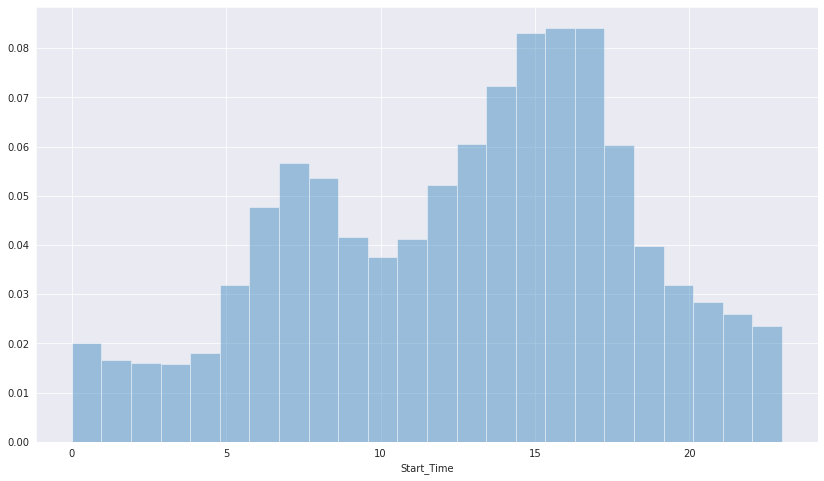

In [ ]:
ax=sns.distplot(Mondays.dt.hour,kde=False,bins=24,norm_hist=True)

plt.show()

## Analyzing Accidents Month Wise

In [ ]:
data['Start_Time'].dt.month

0          2
1          2
2          2
3          2
4          2
          ..
2845337    8
2845338    8
2845339    8
2845340    8
2845341    8
Name: Start_Time, Length: 2845342, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


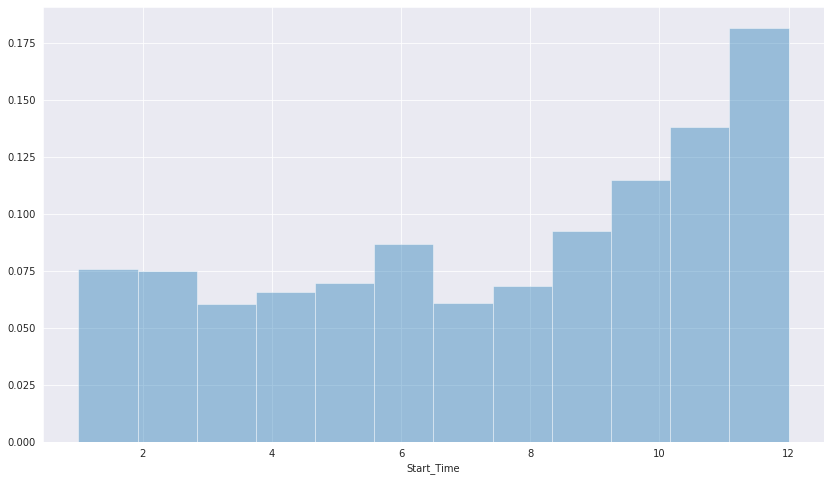

In [ ]:
sns.distplot(data['Start_Time'].dt.month,kde=False,norm_hist=True,bins=12)

### Accident trend year wise:

In [ ]:
year=data.Start_Time[data.Start_Time.dt.year==2017]

In [ ]:
year

14819     2017-01-01 00:44:41
14820     2017-01-01 01:07:05
14821     2017-01-01 01:07:05
14822     2017-01-01 01:58:51
14823     2017-01-01 02:00:10
                  ...        
2771714   2017-08-30 20:01:40
2771715   2017-08-30 20:01:40
2771716   2017-08-30 20:03:10
2771717   2017-08-30 20:49:40
2771718   2017-08-30 20:48:10
Name: Start_Time, Length: 163918, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


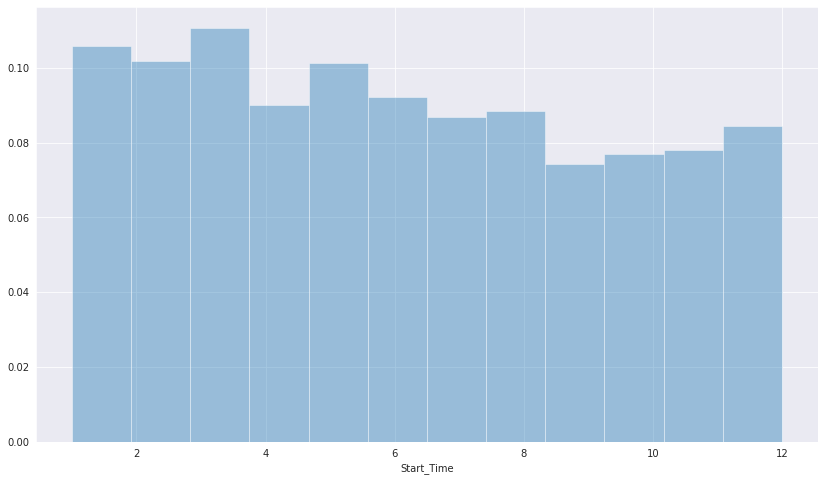

In [ ]:
sns.distplot(year.dt.month,kde=False,norm_hist=True,bins=12)

In [ ]:
year=data.Start_Time[data.Start_Time.dt.year==2016]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


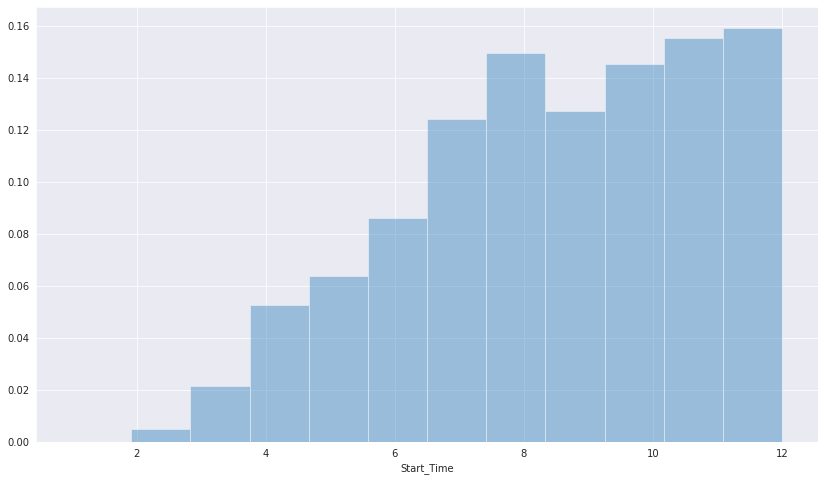

In [ ]:
sns.distplot(year.dt.month,kde=False,norm_hist=True,bins=12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


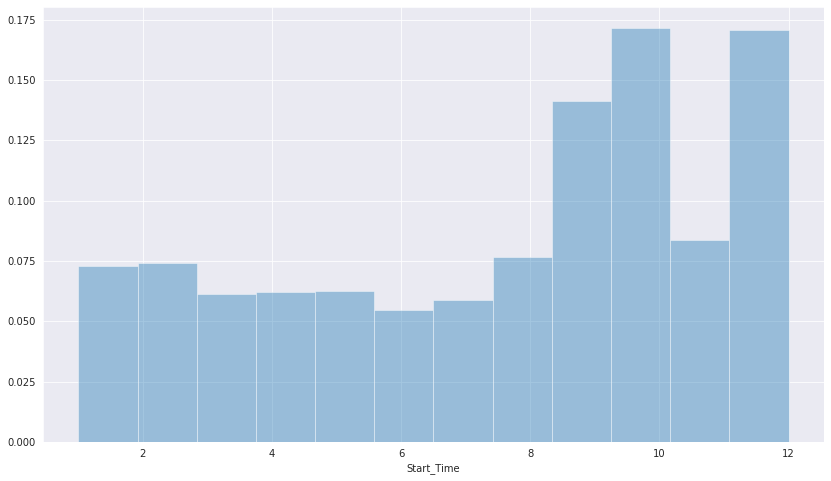

In [ ]:
year=data.Start_Time[data.Start_Time.dt.year==2019]
sns.distplot(year.dt.month,kde=False,norm_hist=True,bins=12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


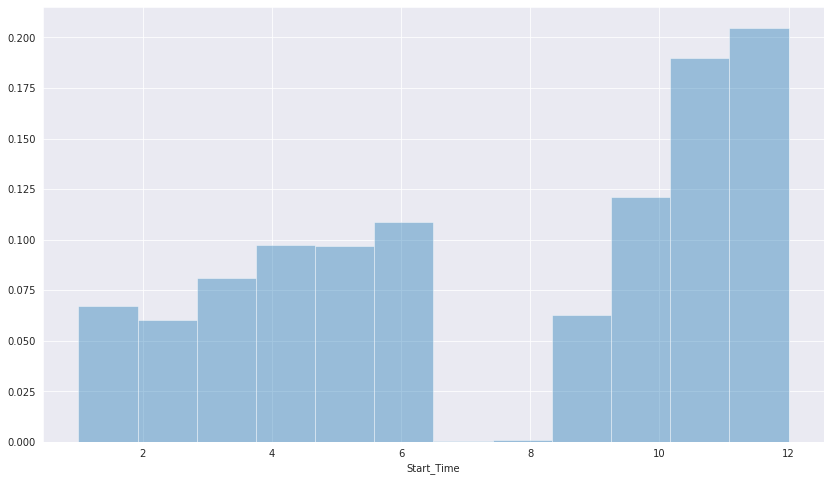

In [ ]:
year=data.Start_Time[data.Start_Time.dt.year==2020]
sns.distplot(year.dt.month,kde=False,norm_hist=True,bins=12)

#### There is some missing data for the year2020

# Analyzing start Longitude and Start Latitude

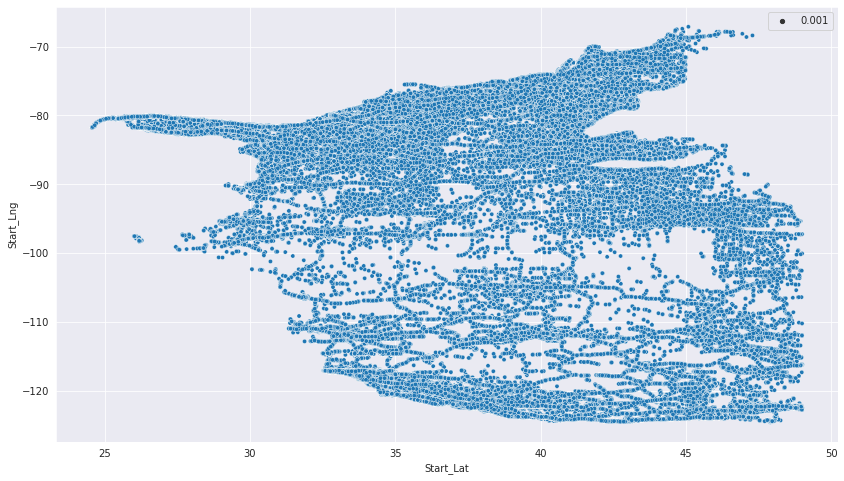

In [ ]:
x=data['Start_Lat']

y=data['Start_Lng']

sns.scatterplot(x=x,y=y,size=0.001)

###Analyzing 10% of the dataset (Sample)

In [ ]:
sample_data=data.sample(int(0.1* len(data)))

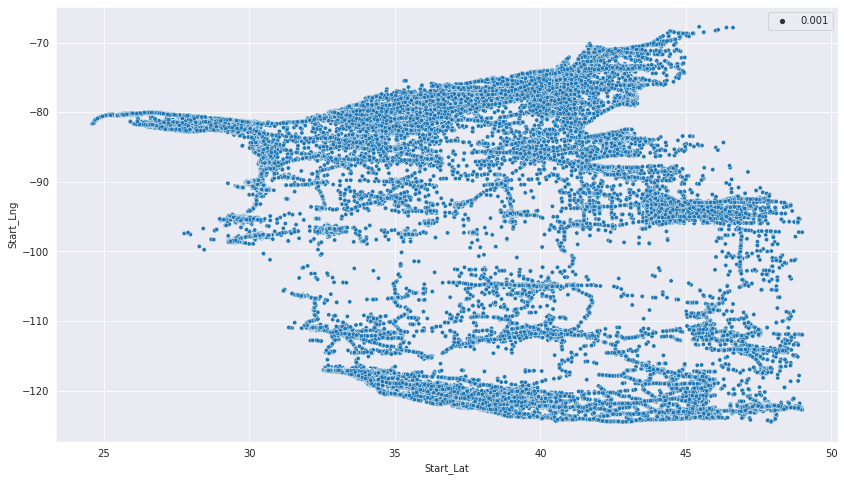

In [ ]:
sns.scatterplot(x=sample_data.Start_Lat,y=sample_data.Start_Lng,size=0.001)

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ushnak-tech/eda-project


'https://jovian.ai/ushnak-tech/eda-project'